In [1]:
import pandas as pd

In [2]:
!dir inputs

 ドライブ C のボリューム ラベルがありません。
 ボリューム シリアル番号は 5AD7-2869 です

 C:\Users\yanai\OneDrive\ドキュメント\Python Scripts\Signate\【練習問題】林型の分類\inputs のディレクトリ

11/03/2021  19:26    <DIR>          .
11/03/2021  19:26    <DIR>          ..
11/03/2021  18:56         2,559,052 sample_submit.csv
11/03/2021  18:56        38,982,818 test.tsv
11/03/2021  18:56        39,562,946 train.tsv
               3 個のファイル          81,104,816 バイト
               2 個のディレクトリ  169,325,109,248 バイトの空き領域


In [3]:
train = pd.read_csv('inputs/train.tsv', sep='\t', index_col=0)
train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3189,202,28,518,-25,1723,194,251,175,3599,...,0,0,0,0,0,0,0,0,0,1
1,3220,14,4,90,5,5940,216,231,153,1153,...,0,0,0,0,0,0,0,0,0,1
3,3221,168,16,30,11,2577,231,244,139,2761,...,0,0,0,0,0,0,0,0,0,7
4,2967,308,14,201,42,1360,181,230,189,3164,...,0,0,0,0,0,0,0,0,0,1
6,3009,16,15,150,16,3650,206,208,137,5053,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581005,3018,135,9,794,132,5891,235,236,133,5496,...,0,0,0,0,0,0,0,0,0,2
581007,3070,8,2,120,3,5334,217,235,155,2536,...,0,0,0,0,0,0,0,0,0,1
581009,2735,14,24,60,26,2227,190,184,123,360,...,0,0,0,0,0,0,0,0,0,2
581010,2813,44,17,150,32,1396,222,201,109,1254,...,0,0,0,0,0,0,0,0,0,2


In [4]:
train['Cover_Type'].value_counts()

2    141843
1    105713
3     17856
7     10223
6      8715
5      4768
4      1388
Name: Cover_Type, dtype: int64

In [5]:
from pycaret.classification import *

In [6]:
exp1 = setup(data = train, target = 'Cover_Type', session_id = 123, normalize = True)

,Description,Value
0,session_id,123
1,Target,Cover_Type
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(290506, 55)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,44
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9320,0.9893,0.8664,0.9321,0.9315,0.8900,0.8904,33.2910
rf,Random Forest Classifier,0.9305,0.9894,0.8565,0.9307,0.9298,0.8874,0.8878,28.2480
dt,Decision Tree Classifier,0.9031,0.9218,0.8489,0.9032,0.9031,0.8444,0.8444,1.8290
knn,K Neighbors Classifier,0.8982,0.9730,0.8051,0.8977,0.8977,0.8357,0.8359,13.4210
xgboost,Extreme Gradient Boosting,0.8653,0.9623,0.8162,0.8654,0.8645,0.7819,0.7822,172.1910
lightgbm,Light Gradient Boosting Machine,0.8558,0.9572,0.8057,0.8557,0.8550,0.7665,0.7669,10.1520
gbc,Gradient Boosting Classifier,0.7716,0.9068,0.6437,0.7707,0.7677,0.6265,0.6271,273.1440
lr,Logistic Regression,0.7252,0.8720,0.5127,0.7124,0.7156,0.5487,0.5496,90.9720
svm,SVM - Linear Kernel,0.7119,0.0000,0.4390,0.7015,0.6957,0.5271,0.5296,2.6400
ridge,Ridge Classifier,0.7010,0.0000,0.3726,0.6799,0.6784,0.5034,0.5057,0.2840


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [16]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9307,0.9896,0.8493,0.9309,0.9300,0.8878,0.8882
1,0.9318,0.9896,0.8574,0.9322,0.9311,0.8894,0.8899
2,0.9270,0.9884,0.8421,0.9272,0.9261,0.8817,0.8821
3,0.9300,0.9894,0.8596,0.9300,0.9294,0.8867,0.8871
4,0.9305,0.9894,0.8615,0.9308,0.9299,0.8875,0.8880
5,0.9277,0.9895,0.8515,0.9279,0.9270,0.8828,0.8833
6,0.9338,0.9896,0.8665,0.9338,0.9332,0.8929,0.8932
7,0.9284,0.9888,0.8478,0.9285,0.9277,0.8841,0.8843
8,0.9318,0.9896,0.8574,0.9320,0.9312,0.8898,0.8901
9,0.9329,0.9897,0.8724,0.9334,0.9324,0.8914,0.8919


In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7000,0.8400,0.4953,0.6930,0.6909,0.5052,0.5064
1,0.7064,0.8435,0.4760,0.6987,0.6967,0.5152,0.5164
2,0.6992,0.8418,0.4598,0.6821,0.6868,0.5030,0.5041
3,0.6960,0.8400,0.4829,0.6874,0.6873,0.4988,0.5000
4,0.7050,0.8451,0.4651,0.6964,0.6934,0.5134,0.5146
5,0.7012,0.8446,0.4831,0.6935,0.6923,0.5074,0.5085
6,0.6982,0.8390,0.4862,0.6890,0.6895,0.5031,0.5041
7,0.7034,0.8433,0.4859,0.6968,0.6949,0.5117,0.5125
8,0.6973,0.8390,0.4709,0.6870,0.6859,0.5006,0.5019
9,0.6958,0.8375,0.4778,0.6879,0.6862,0.4976,0.4990


In [18]:
test = pd.read_csv('inputs/test.tsv', sep='\t', index_col=0)
test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
2,3372,25,17,509,133,3323,210,202,124,1965,...,0,0,0,0,0,0,0,0,1,0
5,2788,16,16,190,59,3090,204,205,134,6213,...,0,0,0,0,0,0,0,0,0,0
11,2088,169,1,30,-10,433,220,239,156,484,...,0,0,0,0,0,0,0,0,0,0
12,2686,40,11,60,-9,1682,221,216,129,1347,...,0,0,0,0,0,0,0,0,0,0
13,2701,144,16,67,18,2469,241,235,119,4795,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580995,2271,338,37,242,133,979,117,162,168,459,...,0,0,0,0,0,0,0,0,0,0
580997,3081,67,13,175,27,1812,233,213,110,3042,...,0,0,1,0,0,0,0,0,0,0
581004,3367,327,11,768,75,2329,193,228,174,1075,...,0,1,0,0,0,0,0,0,0,0
581006,3082,65,8,228,6,3216,228,224,130,937,...,0,0,0,0,0,0,0,0,0,0


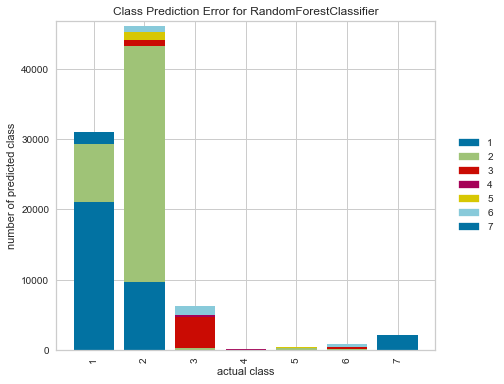

In [19]:
# knn_tunefinal_knn
plot_model(tuned_rf, plot = 'error')

In [20]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
tunefinal_rf = finalize_model(tuned_rf)

In [22]:
# evaluate_model

In [23]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7013,0.8414,0.4838,0.6932,0.6919,0.5083,0.5095


IndexError: index 7 is out of bounds for axis 0 with size 7